In [47]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Importing dataset
tempr = pd.read_csv('Pandas/annual-minimum-and-maximum-temperature-by-stations.csv')

In [8]:
#Printing first 5 rows of data as preview
tempr.head()

,Station,District,Elevation(masl),Max,Min,Year
0,Baitadi Gothalapani,Baitadi,1352.0,24.8,7.1,2017
1,Patan West,Baitadi,1292.0,26.4,14.0,2017
2,Dadeldhura,Dadeldhura,1879.0,22.0,12.0,2017
3,Mahendra Nagar,Kanchanpur,197.0,30.8,18.0,2017
4,Darchula,Darchula,945.0,27.0,15.0,2017


In [12]:
#number of rows and columns of dataset
tempr.shape

(900, 6)

In [11]:
# Statistical summary of dataset
tempr.describe()

,Elevation(masl),Max,Min,Year
count,876.000000,632.000000,504.000000,900.000000
mean,1078.006164,26.305380,14.591071,2019.500000
std,863.491596,4.361324,4.182894,1.708775
min,0.000000,11.900000,-1.800000,2017.000000
25%,189.000000,23.000000,12.300000,2018.000000
50%,965.000000,27.100000,15.000000,2019.500000
75%,1598.000000,30.200000,18.000000,2021.000000
max,3886.000000,33.600000,21.700000,2022.000000


In [14]:
tempr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station          900 non-null    object 
 1   District         834 non-null    object 
 2   Elevation(masl)  876 non-null    float64
 3   Max              632 non-null    float64
 4   Min              504 non-null    float64
 5   Year             900 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.3+ KB


In [15]:
#Finding the number of missing values in each rows
tempr.isnull().sum()

Station              0
District            66
Elevation(masl)     24
Max                268
Min                396
Year                 0
dtype: int64

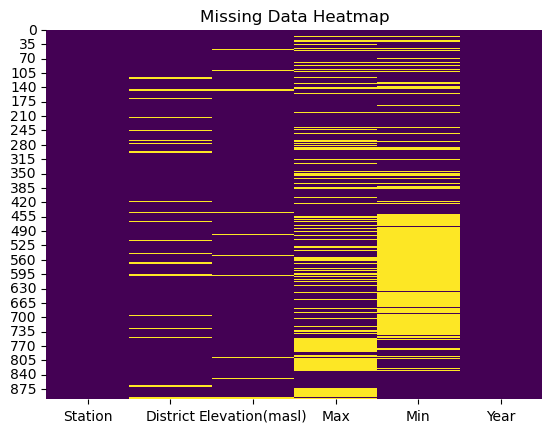

In [70]:
#Missing Data Analysis
missing_data = tempr.isnull().sum()
missing_data

# Visualize missing data
sns.heatmap(tempr.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [60]:
#Since there are a lot of missing values we will fill these values instead of dropping them
cleaned_data = tempr.fillna({
    'District': 'Unknown',
    'Elevation(masl)': tempr['Elevation(masl)'].mean(),
    'Max': tempr['Max'].mean(),
    'Min': tempr['Min'].mean(),
    
})

In [25]:
cleaned_data.head()

,Station,District,Elevation(masl),Max,Min,Year
0,Baitadi Gothalapani,Baitadi,1352.0,24.8,7.1,2017
1,Patan West,Baitadi,1292.0,26.4,14.0,2017
2,Dadeldhura,Dadeldhura,1879.0,22.0,12.0,2017
3,Mahendra Nagar,Kanchanpur,197.0,30.8,18.0,2017
4,Darchula,Darchula,945.0,27.0,15.0,2017


In [20]:
cleaned_data.isnull().sum()

Station            0
District           0
Elevation(masl)    0
Max                0
Min                0
Year               0
dtype: int64

In [29]:
# 5 Stations with highest elevation
cleaned_data.nlargest(5, 'Elevation(masl)')[['Station','Elevation(masl)']]


,Station,Elevation(masl)
52,Chhoser,3886.0
202,Chhoser,3886.0
352,Chhoser,3886.0
502,Chhoser,3886.0
652,Chhoser,3886.0


In [32]:
# 5 Stations with lowest elevation
cleaned_data.nsmallest(5, 'Elevation(masl)')[['Station','Elevation(masl)']]

,Station,Elevation(masl)
44,Jomsom,0.0
194,Jomsom,0.0
344,Jomsom,0.0
494,Jomsom,0.0
644,Jomsom,0.0


This dataset seems to be faulty on elevation value as Jomsom station must be at much higher altitude than 0

In [36]:
# Maximum temperature per district
district_max_temps = cleaned_data.groupby('District')['Max'].max().sort_values(ascending=False).reset_index()
district_max_temps

,District,Max
0,Nawalpur,33.60000
1,Nawalparasi,32.10000
2,Unknown,32.10000
3,Saptari,32.10000
4,Rautahat,31.90000
...,...,...
70,Mustang,26.30538
71,Mugu,26.30538
72,Jumla,26.30538
73,Dolakha,23.90000


In [78]:
# Maximum temperature per year
yearly_max_temps = cleaned_data.groupby('Year')['Max'].max().sort_values(ascending=False).reset_index()
yearly_max_temps


,Year,Max
0,2017,33.6
1,2018,32.7
2,2021,32.7
3,2019,32.0
4,2020,31.7
5,2022,31.5


In [76]:
# stations maximum temperature fluctuation
# Calculate temperature fluctuation for each station
cleaned_data['Temp_Fluctuation'] = cleaned_data['Max'] - cleaned_data['Min']

# Find top 5 stations with max fluctuation
station_fluctuation = cleaned_data.groupby('Station')['Temp_Fluctuation'].mean().nlargest(5)
station_fluctuation


Station
Dipal Gaun              15.938999
Siraha                  15.622028
Baitadi Gothalapani     15.037206
Jumla Airport           14.854769
Anp Chour               14.507746
Name: Temp_Fluctuation, dtype: float64

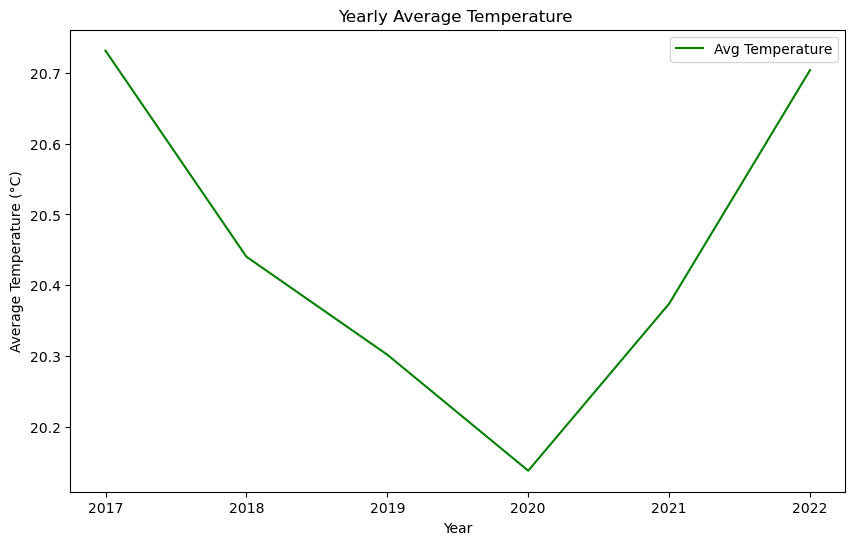

In [64]:

#Visualizing yearly average temperature
# Calculate the yearly average temperature 
cleaned_data['Avg_Temperature'] = (cleaned_data['Max'] + cleaned_data['Min']) / 2

# Group by Year and calculate the mean of Avg_Temperature for each year
yearly_avg_temp = cleaned_data.groupby('Year')['Avg_Temperature'].mean().reset_index()

# Plot the yearly average temperature
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_temp, x='Year', y='Avg_Temperature', color='green', label='Avg Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Yearly Average Temperature ')
plt.legend()
plt.show()

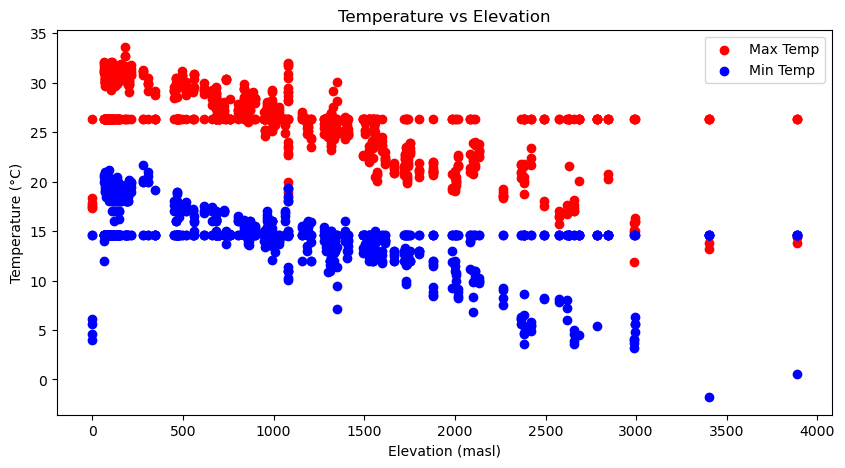

In [54]:
# Scatter plot for Max and Min temperatures vs Elevation
plt.figure(figsize=(10, 5))
plt.scatter(cleaned_data['Elevation(masl)'], cleaned_data['Max'], label='Max Temp', color='red')
plt.scatter(cleaned_data['Elevation(masl)'], cleaned_data['Min'], label='Min Temp', color='blue')
plt.title('Temperature vs Elevation')
plt.xlabel('Elevation (masl)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


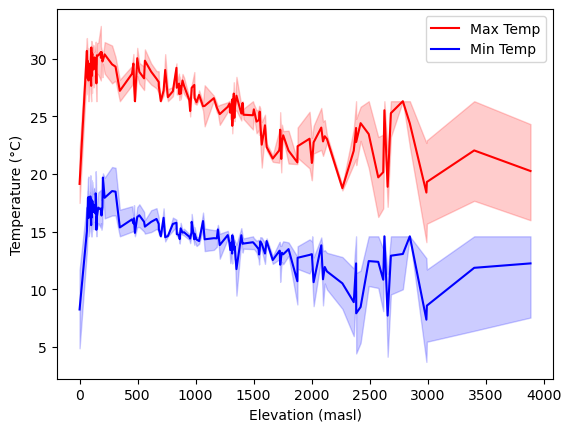

In [51]:
# Lineplot for Max and Min temperatures vs Elevation
sns.lineplot(cleaned_data, x = 'Elevation(masl)',y ='Max',label='Max Temp', color='red' )
sns.lineplot(cleaned_data, x = 'Elevation(masl)',y ='Min',label='Min Temp', color='blue' )
plt.xlabel('Elevation (masl)')
plt.ylabel('Temperature (°C)')
plt.legend()

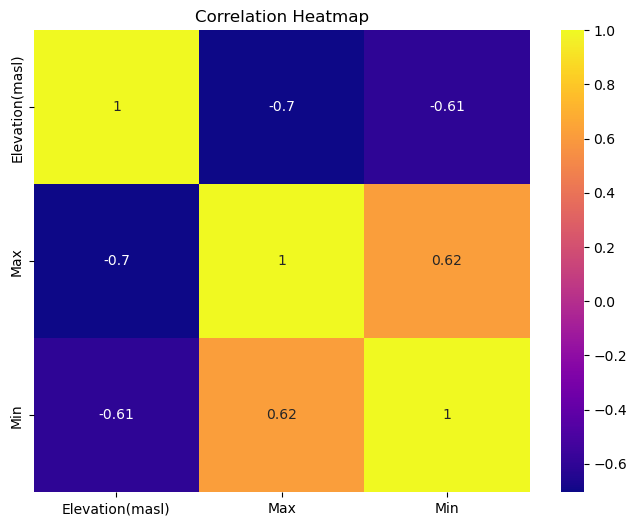

In [73]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data[['Elevation(masl)', 'Max', 'Min']].corr(), annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()


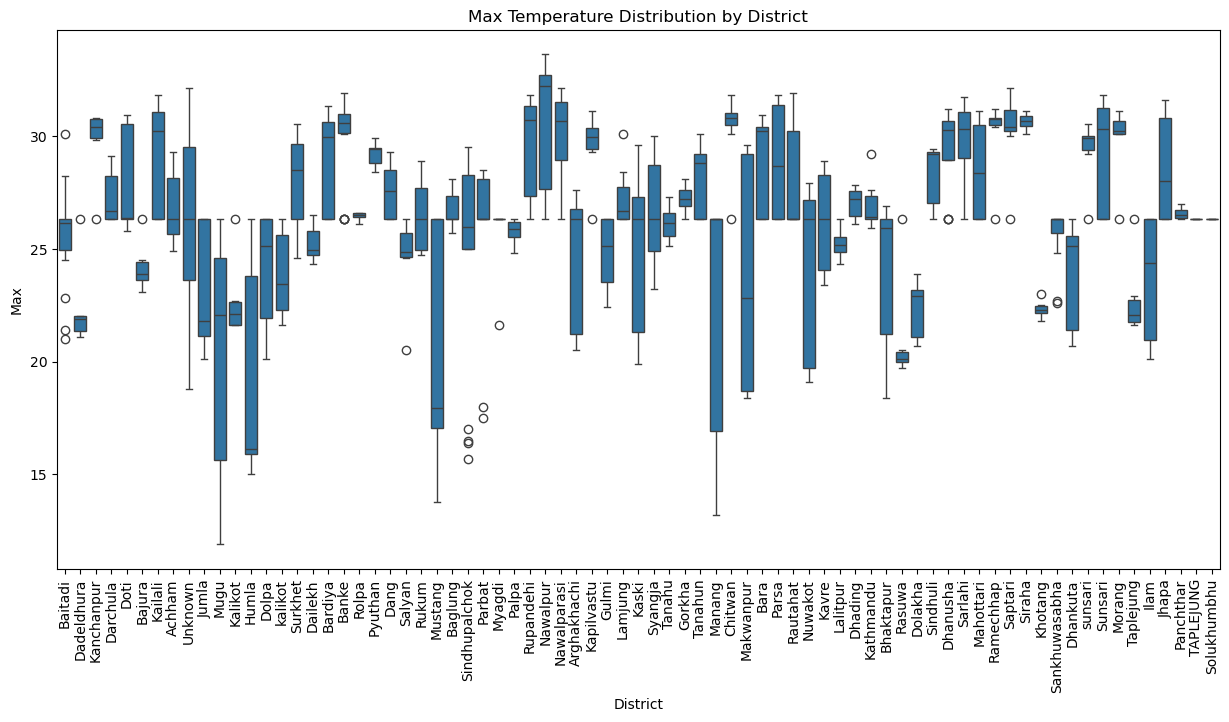

In [81]:
# Max Temperature Distribution by District
plt.figure(figsize=(15, 7))
sns.boxplot(cleaned_data, x='District', y='Max')
plt.title('Max Temperature Distribution by District')
plt.xticks(rotation=90)
plt.show()




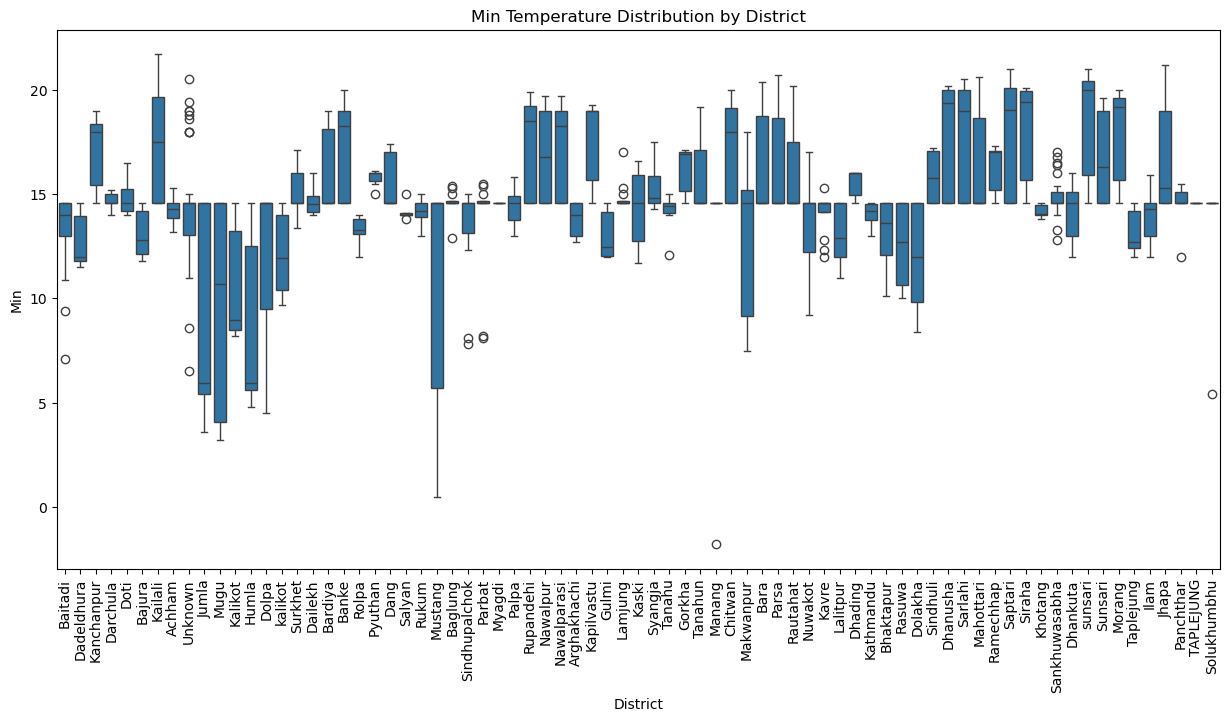

In [83]:
# Min Temperature Distribution by District

plt.figure(figsize=(15, 7))
sns.boxplot(cleaned_data,x='District', y='Min')
plt.title('Min Temperature Distribution by District')
plt.xticks(rotation=90)
plt.show()